 ## Insta Cart Recommendation System 

## Purpose 
The purpose of this Notebook is to do the Analysis on 3 million grocery orders in Insta cart  

I have analysed various relationship and effect of features and concluded with various findings 

I have loaded all the datasets from Kaggle in Python.  
The Dataset is anonymized and contains a sample of over 3 million grocery orders from more than 200,000 Instacart users.  

## Aanalysis
I have done the below analysis:  
1)  Number of orders that are reordered in each hour of the day  
2)  Number of orderes that are reordered in each day of the week  
3)  Number of days between the orders reordered since previous orderes  
4)  Order IDs ordered that have maximum Products  
5)  Products that are considered for reorder   
6)  Number of days the product was prior ordered    
7)  Day and time of the week the product was reordered     
8)  Number of customers who reordered the same productId : Maximum productID reordered     
9)  Department and Asile to which the products belong to : Maximum Department and Aisle in demand   
10) Users ordered the maximum  
11) Percentage of orders reordered  
12) Minimum and maximum days since prior order of the product  
13) Minimum and maximum hours the day for products reorder  
14) Minimum and maximum day of the week for produts reorder  
15) Products , department and Aisle which have maximum sold products   

Now let's jump straight into the data and do some exploratory analysis !!  


Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Import All the files 

In [2]:
order_prod_prioir = pd.read_csv("C:/Users/nikhi/data/order_products__prior.csv")
sample_submission = pd.read_csv("C:/Users/nikhi/data/sample_submission.csv")
products = pd.read_csv("C:/Users/nikhi/data/products.csv")
departments = pd.read_csv("C:/Users/nikhi/data/departments.csv")
aisles = pd.read_csv("C:/Users/nikhi/data/aisles.csv")
orders = pd.read_csv("C:/Users/nikhi/data/orders.csv")
order_products__train = pd.read_csv("C:/Users/nikhi/data/order_products__train.csv")

In [97]:
order_prod_prioir.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [96]:
order_products__train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [5]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [98]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


Check for the empty / NA fields for data consistency

In [3]:
orders['days_since_prior_order'] = orders.days_since_prior_order.fillna(0)

In [8]:
orders.isna().sum()

order_id                  0
user_id                   0
eval_set                  0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
dtype: int64

Analyse the orders ordered in day of the week 

In [4]:
sns.countplot(x='order_dow',data=orders)
plt.title('Order - day of the week')
plt.show()

NameError: name 'orders' is not defined

Analyse the orders ordered in hour of the day

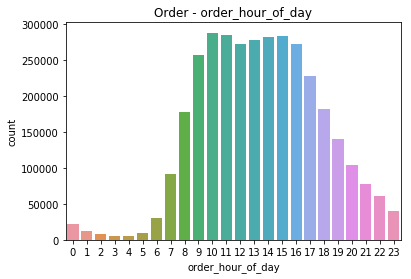

In [10]:
sns.countplot(x='order_hour_of_day',data=orders)
plt.title('Order - order_hour_of_day')
plt.show()

Analyse  the orders ordered since prior order

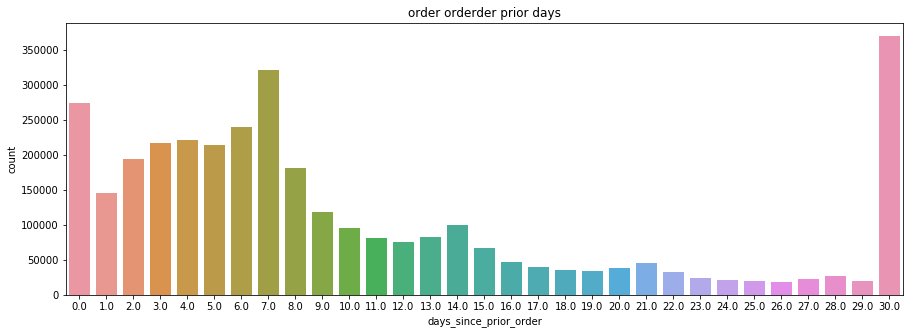

In [11]:
sns.countplot(x='days_since_prior_order',data=orders)
plt.title('order orderder prior days')
fig = plt.gcf()
fig.set_size_inches( 15, 5)
plt.show()

Plot the dataset showing the number of Train , test and evaluated data

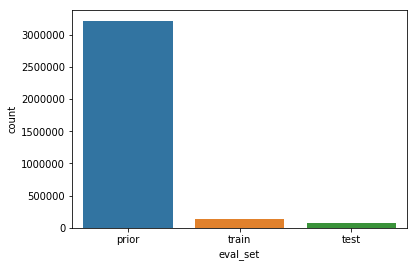

In [13]:
sns.countplot(x='eval_set',data=orders)

In [12]:
sample_submission.head()

,order_id,products
0,17,39276 29259
1,34,39276 29259
2,137,39276 29259
3,182,39276 29259
4,257,39276 29259


In [13]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [14]:
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


I do the merging of below tables so as to get the details of all the individual tables in a single table

In [4]:
order_prior_merge_orders = pd.merge(order_prod_prioir,orders,on = 'order_id')
order_prior_merge_orders_merge_products = pd.merge(order_prior_merge_orders,products ,on='product_id')
# order_prior_merge_orders.head()
order_prior_merge_orders_merge_products.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id
0,2,33120,1,1,202279,prior,3,5,9,8.0,Organic Egg Whites,86,16
1,26,33120,5,0,153404,prior,2,0,16,7.0,Organic Egg Whites,86,16
2,120,33120,13,0,23750,prior,11,6,8,10.0,Organic Egg Whites,86,16
3,327,33120,5,1,58707,prior,21,6,9,8.0,Organic Egg Whites,86,16
4,390,33120,28,1,166654,prior,48,0,12,9.0,Organic Egg Whites,86,16


In [5]:
order_prior_merge_orders_merge_products_merge_aisle = pd.merge(order_prior_merge_orders_merge_products,aisles,on='aisle_id')

In [6]:
order_prior_merge_orders_merge_products_merge_aisle.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,aisle
0,2,33120,1,1,202279,prior,3,5,9,8.0,Organic Egg Whites,86,16,eggs
1,26,33120,5,0,153404,prior,2,0,16,7.0,Organic Egg Whites,86,16,eggs
2,120,33120,13,0,23750,prior,11,6,8,10.0,Organic Egg Whites,86,16,eggs
3,327,33120,5,1,58707,prior,21,6,9,8.0,Organic Egg Whites,86,16,eggs
4,390,33120,28,1,166654,prior,48,0,12,9.0,Organic Egg Whites,86,16,eggs


Analyse the order ID having maximum Products in it

In [6]:
group_by_order_id_product_id = order_prior_merge_orders_merge_products_merge_aisle.groupby(['order_id'])['product_id'].count().reset_index()

Order ID 1564244 has the maximum orders

In [18]:
orer_prod = group_by_order_id_product_id.sort_values('product_id',ascending=False).head()

Plot showing the maximum number of Products contained in an Order Id

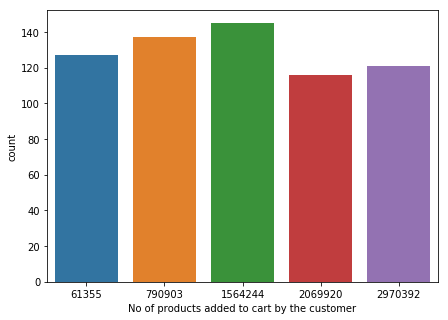

In [19]:
fig = plt.gcf()
fig.set_size_inches(7, 5)
sns.barplot(x='order_id',y='product_id',data=orer_prod.head())
plt.xlabel("No of products added to cart by the customer")
plt.ylabel("count")
plt.show()

Group by to check number of times the Product Ids that are reordered

In [8]:
groupby_product_id_reorder = order_prior_merge_orders_merge_products_merge_aisle.groupby(['product_id'])['reordered'].aggregate("max").reset_index()

In [53]:
groupby_product_id_reorder.head()

,product_id,reordered
0,1,1
1,2,1
2,3,1
3,4,1
4,5,1


No of product Ids that are reordered is indicated by count of 1    
No of product Id not reordered  is indicated by count of  0

In [21]:
count = groupby_product_id_reorder.reordered.value_counts()
count

1    45305
0     4372
Name: reordered, dtype: int64

Plot to Show the number of Product IDs ordered vs reordered

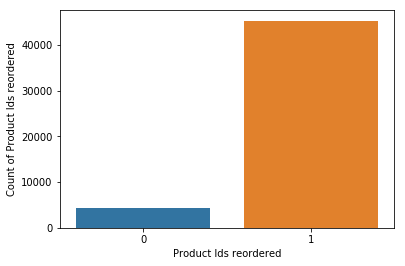

In [55]:
sns.barplot(count.index , count.values)
plt.xlabel("Product Ids reordered")
plt.ylabel("Count of Product Ids reordered")
plt.show()

Now we can check the Product IDs that are reordered and do the analysis on them as below:   
      1)Number of days prior it was reordered   
      2)Day and time of the week it was reordered   
      3)Number of customers who reordered the same productId : Maximum productID reordered    
      4)Department and Asile to which the products belong to : Maximum Department and Aisle in demand  
     
    

In [9]:
sort_prod = order_prior_merge_orders_merge_products_merge_aisle.sort_values('product_id')

Group by to determine the count of each product Ids that are add to cart 

In [7]:
groupby_product_id_add_cart = order_prior_merge_orders_merge_products_merge_aisle.groupby(['product_id'])['add_to_cart_order'].aggregate("max").reset_index()

In [24]:
groupby_product_id_add_cart.head()

,product_id,add_to_cart_order
0,1,74
1,2,45
2,3,41
3,4,36
4,5,16


It can be seen that 40% of the products were reordered by the users

In [8]:
percent_reordered = (groupby_product_id_add_cart['add_to_cart_order'].sum() / groupby_product_id_reorder['reordered'].sum())

In [9]:
percent_reordered

40.84017216642755

Lets start analysing the Users 

In [27]:
order_prior_merge_orders_merge_products_merge_aisle

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,aisle
0,2,33120,1,1,202279,prior,3,5,9,8.0,Organic Egg Whites,86,16,eggs
1,26,33120,5,0,153404,prior,2,0,16,7.0,Organic Egg Whites,86,16,eggs
2,120,33120,13,0,23750,prior,11,6,8,10.0,Organic Egg Whites,86,16,eggs
3,327,33120,5,1,58707,prior,21,6,9,8.0,Organic Egg Whites,86,16,eggs
4,390,33120,28,1,166654,prior,48,0,12,9.0,Organic Egg Whites,86,16,eggs
5,537,33120,2,1,180135,prior,15,2,8,3.0,Organic Egg Whites,86,16,eggs
6,582,33120,7,1,193223,prior,6,2,19,10.0,Organic Egg Whites,86,16,eggs
7,608,33120,5,1,91030,prior,11,3,21,12.0,Organic Egg Whites,86,16,eggs
8,623,33120,1,1,37804,prior,63,3,12,3.0,Organic Egg Whites,86,16,eggs
9,689,33120,4,1,108932,prior,16,1,13,3.0,Organic Egg Whites,86,16,eggs


Check which User ID has bought maximum of products

In [28]:
value_user_id = order_prior_merge_orders_merge_products_merge_aisle.user_id.value_counts()

In [8]:
product_id_reorder_days1 = order_prior_merge_orders_merge_products_merge_aisle.groupby(['user_id'])['product_id'].count().reset_index()

It can be seen that the User id 201268 has maximum product Ids

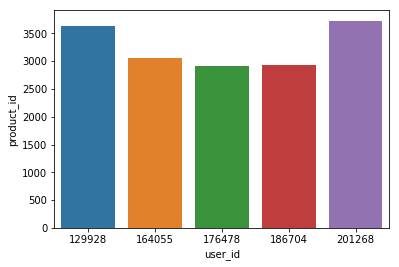

In [11]:
plot = product_id_reorder_days1.sort_values('product_id',ascending=False).head()
sns.barplot(x='user_id',y='product_id',data=plot.head())

Now lets see the number of days since the order was preordered

In [9]:
product_id_reorder_1 = order_prior_merge_orders_merge_products_merge_aisle.loc[order_prior_merge_orders_merge_products_merge_aisle['reordered']==1]

In [18]:
product_id_reorder_1.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,aisle
0,2,33120,1,1,202279,prior,3,5,9,8.0,Organic Egg Whites,86,16,eggs
3,327,33120,5,1,58707,prior,21,6,9,8.0,Organic Egg Whites,86,16,eggs
4,390,33120,28,1,166654,prior,48,0,12,9.0,Organic Egg Whites,86,16,eggs
5,537,33120,2,1,180135,prior,15,2,8,3.0,Organic Egg Whites,86,16,eggs
6,582,33120,7,1,193223,prior,6,2,19,10.0,Organic Egg Whites,86,16,eggs


Chekc the number of orders that were reordered by each user

In [10]:
user_id_reorder= product_id_reorder_1.groupby(['user_id'])['reordered'].count().reset_index()
user_id_reorder.head()

,user_id,reordered
0,1,41
1,2,93
2,3,55
3,4,1
4,5,14


User ID 201268 has reordered maximum number of times compared to all other users

In [142]:
user_reordered_max = user_id_reorder.sort_values('reordered',ascending=False).head()

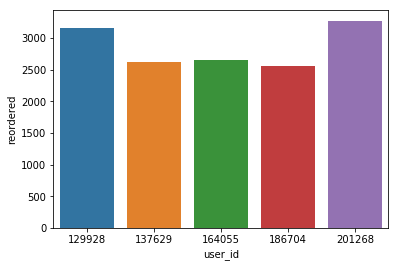

In [143]:
sns.barplot(x='user_id',y='reordered',data=user_reordered_max.head())

Check the add to cart order by each user

In [11]:
user_id_add_cart = product_id_reorder_1.groupby('user_id')['add_to_cart_order'].sum().reset_index()
user_id_add_cart.head()

,user_id,add_to_cart_order
0,1,135
1,2,676
2,3,204
3,4,6
4,5,70


Again User Id 201268 has done maximum Orders

In [17]:
user_id_add_cart.sort_values('add_to_cart_order',ascending=False).head()

,user_id,add_to_cart_order
128028,129928,115280
198301,201268,92145
106618,108187,65446
179305,181991,62765
56761,57546,61078


Merge the datasets to analyse orderes add by each user with the reorders

In [12]:
df_reorder_add_cart = pd.merge(user_id_add_cart,user_id_reorder,on='user_id')
df_reorder_add_cart['per of order reordered'] = (df_reorder_add_cart.reordered/df_reorder_add_cart.add_to_cart_order)*100
df_reorder_add_cart[0:20]

,user_id,add_to_cart_order,reordered,per of order reordered
0,1,135,41,30.370370
1,2,676,93,13.757396
2,3,204,55,26.960784
3,4,6,1,16.666667
4,5,70,14,20.000000
5,6,5,2,40.000000
6,7,937,138,14.727855
7,8,98,13,13.265306
8,9,141,18,12.765957
9,10,775,49,6.322581


Plot indicates the User ID vs number of orders orders, reorderd and the percentage of orders that are reordered

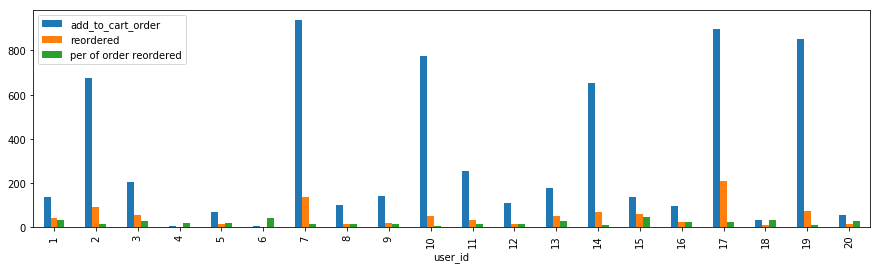

In [19]:
df_reorder_add_cart[0:20].plot(x="user_id", y=["add_to_cart_order", "reordered", "per of order reordered"], kind="bar",figsize=(15,4))

Add the column indicating the Average number of days and prior days a user reorders

In [13]:
user_id_priordays_reord = product_id_reorder_1.groupby(['user_id'])['days_since_prior_order'].mean().reset_index()
user_id_priordays_reord.rename(index=str,columns={"days_since_prior_order":"avg_days_since_prior_order"},inplace=True)
user_id_priordays_reord.head()

,user_id,avg_days_since_prior_order
0,1,19.634146
1,2,16.623656
2,3,10.890909
3,4,21.000000
4,5,15.428571


In [14]:
user_id_dow_reord = product_id_reorder_1.groupby(['user_id'])['order_dow'].mean().reset_index()
user_id_dow_reord.rename(index=str,columns={'order_dow':'avergae_order_dow'},inplace = True)
user_id_dow_reord.head()

,user_id,avergae_order_dow
0,1,2.560976
1,2,1.688172
2,3,0.745455
3,4,4.000000
4,5,1.000000


In [15]:
user_id_hr_reord = product_id_reorder_1.groupby(['user_id'])['order_hour_of_day'].mean().reset_index()
user_id_hr_reord.rename(index=str,columns={'order_hour_of_day':"avg_order_hour_of_day"},inplace=True)
user_id_hr_reord.head()

,user_id,avg_order_hour_of_day
0,1,10.731707
1,2,10.419355
2,3,16.381818
3,4,15.000000
4,5,17.428571


Concatenate all the tables determing the avergae days , hours and weeks

In [16]:
df_list = [df_reorder_add_cart,user_id_priordays_reord,user_id_hr_reord,user_id_dow_reord]
User_reorder_table = reduce(lambda left,right: pd.merge(left,right,on='user_id'), df_list)
User_reorder_table.head()

,user_id,add_to_cart_order,reordered,per of order reordered,avg_days_since_prior_order,avg_order_hour_of_day,avergae_order_dow
0,1,135,41,30.370370,19.634146,10.731707,2.560976
1,2,676,93,13.757396,16.623656,10.419355,1.688172
2,3,204,55,26.960784,10.890909,16.381818,0.745455
3,4,6,1,16.666667,21.000000,15.000000,4.000000
4,5,70,14,20.000000,15.428571,17.428571,1.000000


Here , the table contains the avergae number of days prior order , avg number of hous , average fays of the week for each user to reorder the order

In [17]:
User_details = round(User_reorder_table).head()

In [18]:
# User_details['avg_days_since_prior_order'].max()
# User_details['avg_days_since_prior_order'].min()
print("--------------------------------------------------------------")
print('User Report having maximum and minium details for each column')
print("--------------------------------------------------------------")
print("")

print("average minimum days since prior order" ,User_details['avg_days_since_prior_order'].min())
print("average maximum days since prior order" ,User_details['avg_days_since_prior_order'].max())
print("--------------------------------------------------------------")
print("")

print("average minimum hours of the day for reorder for reorder" ,User_details['avg_order_hour_of_day'].min())
print("average maximum hours of the day for reorder for reorder" ,User_details['avg_order_hour_of_day'].max())
print("--------------------------------------------------------------")
print("")



print("average minimum day of the week for reorder" ,User_details['avergae_order_dow'].min())
print("average maximum day of the week for reorder" ,User_details['avergae_order_dow'].max())
print("--------------------------------------------------------------")
print("")




--------------------------------------------------------------
User Report having maximum and minium details for each column
--------------------------------------------------------------

average minimum days since prior order 11.0
average maximum days since prior order 21.0
--------------------------------------------------------------

average minimum hours of the day for reorder for reorder 10.0
average maximum hours of the day for reorder for reorder 17.0
--------------------------------------------------------------

average minimum day of the week for reorder 1.0
average maximum day of the week for reorder 4.0
--------------------------------------------------------------



Now lets move forward and check the number of Product Ids sold

In [20]:
order_prior_merge_orders_merge_products_merge_aisle_merge_dept = pd.merge(order_prior_merge_orders_merge_products_merge_aisle,departments,on='department_id')

In [21]:
groupby_order_prod = order_prior_merge_orders_merge_products_merge_aisle_merge_dept.groupby(['order_id'])['product_id'].count().reset_index()

In [22]:
groupby_order_prod.head()

,order_id,product_id
0,2,9
1,3,8
2,4,13
3,5,26
4,6,3


In [23]:
groupby_order_prod_sort = groupby_order_prod.sort_values('product_id',ascending=False)
groupby_order_prod_sort.head()

,order_id,product_id
1469463,1564244,145
742844,790903,137
57588,61355,127
2791358,2970392,121
1944784,2069920,116


Order Id having maximum Product Ids is 1395075

In [24]:
groupby_order_prod_sort[0:60]
groupby_order_prod_sort.loc[groupby_order_prod_sort.product_id.idxmax()]

order_id      1564244
product_id        145
Name: 1469463, dtype: int64

Lets find the Product ID which is maximum sold

In [25]:
groupby_prod_ord = order_prior_merge_orders_merge_products_merge_aisle_merge_dept.groupby('product_id')['order_id'].count().reset_index()

In [26]:
groupby_prod_ord.head()

,product_id,order_id
0,1,1852
1,2,90
2,3,277
3,4,329
4,5,15


It can be seen that Product ID 24852 is in 472565 order Ids

In [27]:
groupby_prod_ord.loc[groupby_prod_ord['order_id'].idxmax()]

product_id     24852
order_id      472565
Name: 24848, dtype: int64

In [28]:
groupby_prod_ord.sort_values('order_id' ,ascending=False).head()

,product_id,order_id
24848,24852,472565
13172,13176,379450
21133,21137,264683
21899,21903,241921
47198,47209,213584


Lets check the Product description corresponding to maximum products sold

In [29]:
prod_max = order_prior_merge_orders_merge_products_merge_aisle_merge_dept.product_name.value_counts().head().reset_index()
prod_max.head()

,index,product_name
0,Banana,472565
1,Bag of Organic Bananas,379450
2,Organic Strawberries,264683
3,Organic Baby Spinach,241921
4,Organic Hass Avocado,213584


Text(0, 0.5, 'Count')

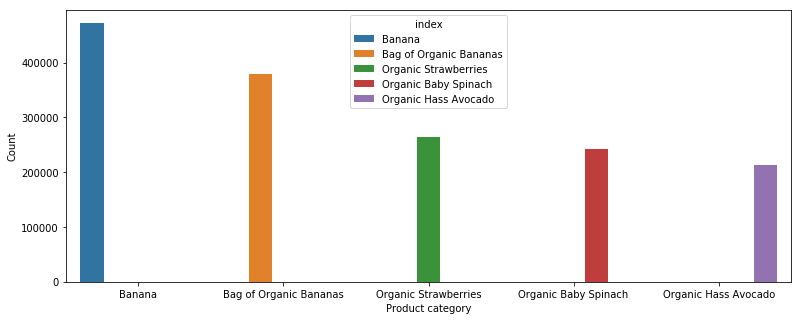

In [30]:
fig = plt.gcf()
fig.set_size_inches(13,5)
sns.barplot(x='index',y='product_name',data=prod_max,hue='index')
plt.xlabel('Product category')
plt.ylabel('Count')

Lets check the Aisle count

In [31]:
aisle_max = order_prior_merge_orders_merge_products_merge_aisle.aisle.value_counts().head().reset_index()
aisle_max

,index,aisle
0,fresh fruits,3642188
1,fresh vegetables,3418021
2,packaged vegetables fruits,1765313
3,yogurt,1452343
4,packaged cheese,979763


Text(0, 0.5, 'Count')

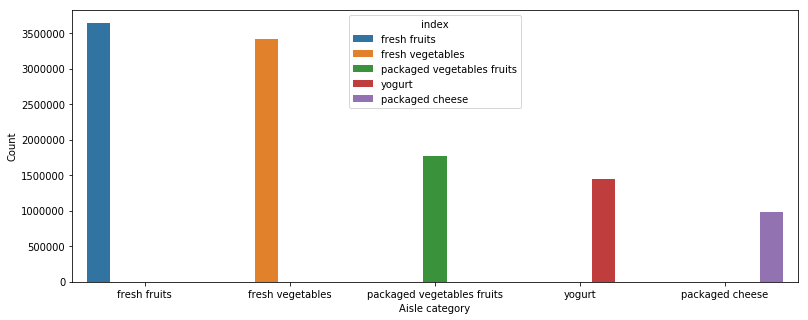

In [112]:
fig = plt.gcf()
fig.set_size_inches(13,5)
sns.barplot(x='index',y='aisle',data=aisle_max,hue='index')
plt.xlabel('Aisle category')
plt.ylabel('Count')

Maximum Aisle that are sold are Fresh Fruits

In [32]:
aisle_max.loc[aisle_max['aisle'].idxmax()]

index    fresh fruits
aisle         3642188
Name: 0, dtype: object

Lets Explore the maxim product Id 24852 that is sold

In [33]:
prod_name_max = order_prior_merge_orders_merge_products_merge_aisle_merge_dept.loc[order_prior_merge_orders_merge_products_merge_aisle.product_id==24852]

In [34]:
prod_name_max.head()

,order_id,product_id,add_to_cart_order,reordered,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_name,aisle_id,department_id,aisle,department
12920759,798489,43122,31,0,191519,prior,2,1,11,30.0,Organic Bartlett Pear,24,4,fresh fruits,produce
12920760,798678,43122,5,1,43281,prior,71,4,7,4.0,Organic Bartlett Pear,24,4,fresh fruits,produce
12920761,798680,43122,12,1,107660,prior,65,0,11,4.0,Organic Bartlett Pear,24,4,fresh fruits,produce
12920762,799065,43122,10,0,1553,prior,36,1,15,9.0,Organic Bartlett Pear,24,4,fresh fruits,produce
12920763,799067,43122,2,1,37731,prior,30,6,14,3.0,Organic Bartlett Pear,24,4,fresh fruits,produce


Lets check the number of products that are reordered based on days since prior order

In [35]:
prod_name_max_group = prod_name_max.groupby(['days_since_prior_order'])['reordered'].count().reset_index()
prod_name_max_group.head()

,days_since_prior_order,reordered
0,0.0,6537
1,1.0,14293
2,2.0,23239
3,3.0,29798
4,4.0,33697


In [36]:
prod_name_max_group.sort_values('reordered',ascending=False).head()

,days_since_prior_order,reordered
7,7.0,55332
6,6.0,39108
30,30.0,38431
4,4.0,33697
5,5.0,33481


It can be seen that the maximum reorders for bananas is within a week

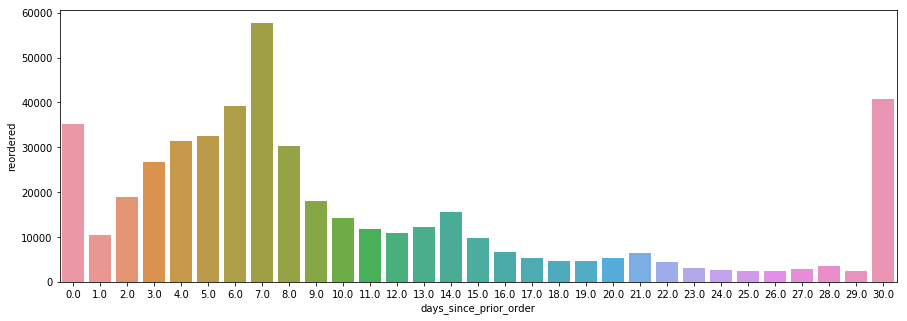

In [121]:
fig = plt.gcf()
fig.set_size_inches(15, 5)
sns.barplot(x='days_since_prior_order',y='reordered',data=prod_name_max_group)

Lets see the hours in which the products are reordered

In [122]:
prod_sold_max_group = prod_name_max.groupby(['order_hour_of_day','order_dow'])['reordered'].count().reset_index()
prod_sold_max_group.head()

,order_hour_of_day,order_dow,reordered
0,0,0,560
1,0,1,498
2,0,2,360
3,0,3,329
4,0,4,309


In [126]:
prod_sold_max_group[0:8]

,order_hour_of_day,order_dow,reordered
0,0,0,560
1,0,1,498
2,0,2,360
3,0,3,329
4,0,4,309
5,0,5,355
6,0,6,404
7,1,0,321


Lets Plot the no of orders reordered in a day based on hours   
It seems the ordersa are reordered in the time range of 8'o clock-17'o clock

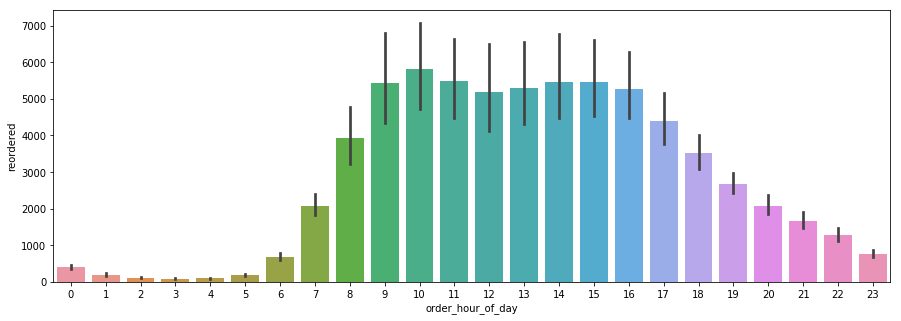

In [139]:
fig = plt.gcf()
fig.set_size_inches(15, 5)
sns.barplot(x='order_hour_of_day',y='reordered',data=prod_sold_max_group)
plt.show()

Lets Plot the no of orders reordered in days   
It seems the orders are reordered on Sunday & Monday

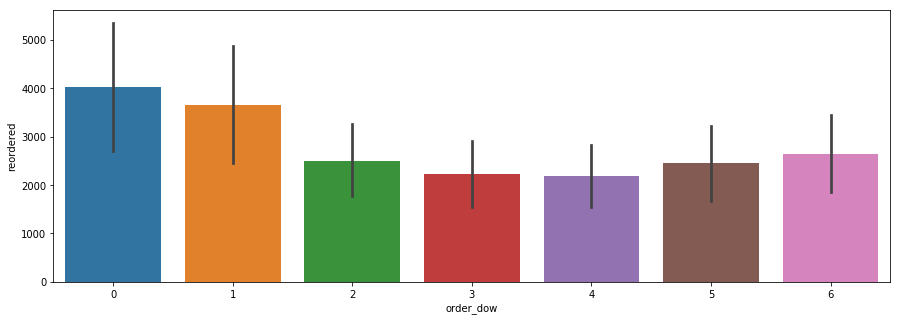

In [147]:
fig = plt.gcf()
fig.set_size_inches(15, 5)
sns.barplot(x='order_dow',y='reordered',data=prod_sold_max_group)
plt.show()

Till now , we checked the details for the Maximum Product Id that is sold  
Now lets work on the entire dataset again and explore further

In [38]:
reorder_since_prioirday = order_prior_merge_orders_merge_products_merge_aisle_merge_dept.groupby(['days_since_prior_order'])['reordered'].count().reset_index()

It can be seen that the maximum reorders are 7 days since prior order

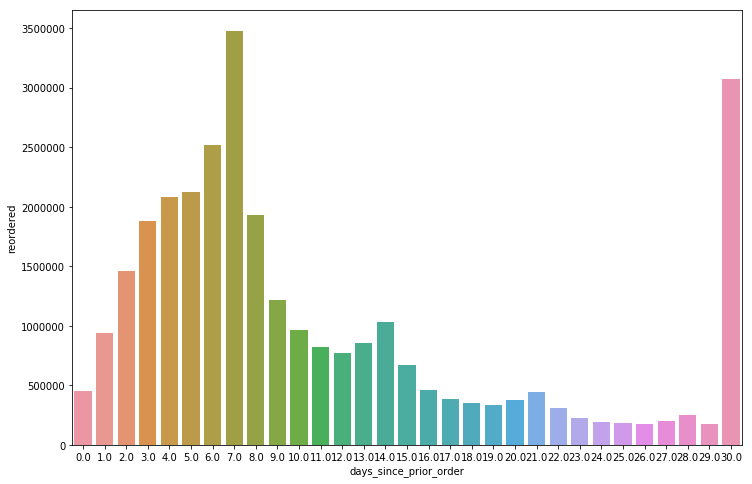

In [40]:
fig = plt.gcf()
fig.set_size_inches(12, 8)
sns.barplot(x='days_since_prior_order',y='reordered',data=reorder_since_prioirday)
plt.show()

Lets check the hours of the day when the reorder is maximum

In [44]:
reorder_since_order_of_day = order_prior_merge_orders_merge_products_merge_aisle_merge_dept.groupby(['order_hour_of_day','order_dow'])['reordered'].count().reset_index()

In [45]:
reorder_since_order_of_day.head()

,order_hour_of_day,order_dow,reordered
0,0,0,38876
1,0,1,37114
2,0,2,29914
3,0,3,27525
4,0,4,24719


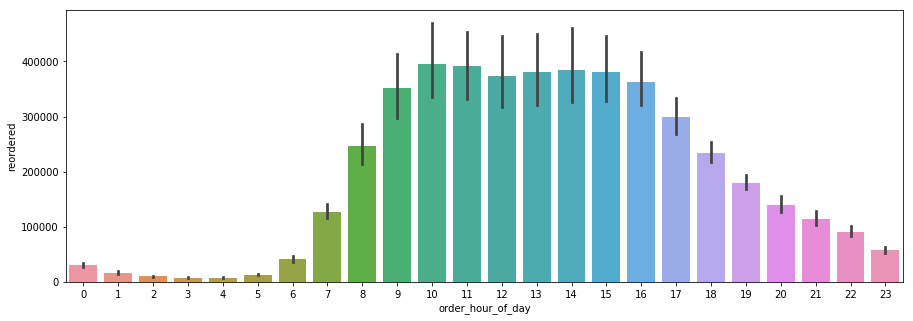

In [46]:
fig = plt.gcf()
fig.set_size_inches(15, 5)
sns.barplot(x='order_hour_of_day',y='reordered',data=reorder_since_order_of_day)

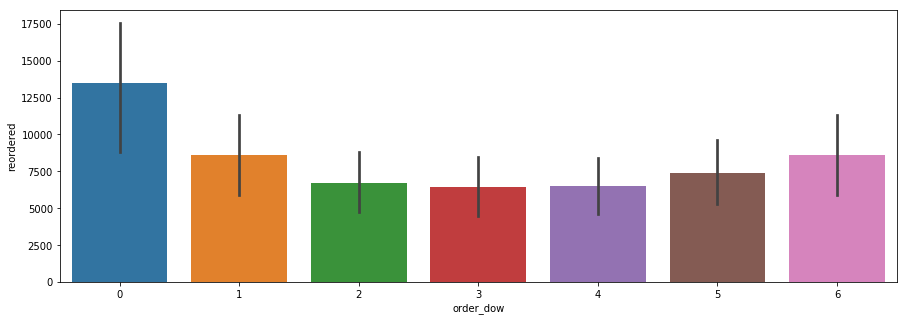

In [52]:
fig = plt.gcf()
fig.set_size_inches(15, 5)
sns.barplot(x='order_dow',y='reordered',data=reorder_since_order_of_day)

Determine the products and aisle reordered.  

This determines the the overall products in the dataset that were added to the cart and reordered

In [48]:
prod_reordered = order_prior_merge_orders_merge_products_merge_aisle_merge_dept.groupby(['product_name','aisle'])['reordered'].count().reset_index()
prod_reordered
prod_reordered_sum = prod_reordered['reordered'].sum()

prod_ad_cart = order_prior_merge_orders_merge_products_merge_aisle_merge_dept.groupby(['product_name','aisle'])['add_to_cart_order'].count().reset_index()
prod_ad_cart.head()
prod_cart_sum = prod_ad_cart['add_to_cart_order'].sum()

print("Overall Products added to cart ", prod_cart_sum)
print("Overall Products reordered ", prod_reordered_sum)


Overall Products added to cart  32434489
Overall Products reordered  32434489


In [55]:
prod_reordered.head()

,product_name,aisle,reordered
0,#2 Coffee Filters,coffee,22
1,#2 Cone White Coffee Filters,coffee,1
2,#2 Mechanical Pencils,more household,1
3,#4 Natural Brown Coffee Filters,coffee,6
4,& Go! Hazelnut Spread + Pretzel Sticks,spreads,10


Check the department distribution 

In [50]:
dept_count = order_prior_merge_orders_merge_products_merge_aisle_merge_dept.department.value_counts().reset_index()
dept_count

,index,department
0,produce,9479291
1,dairy eggs,5414016
2,snacks,2887550
3,beverages,2690129
4,frozen,2236432
5,pantry,1875577
6,bakery,1176787
7,canned goods,1068058
8,deli,1051249
9,dry goods pasta,866627


Text(0.5, 1.0, 'Department Distribution')

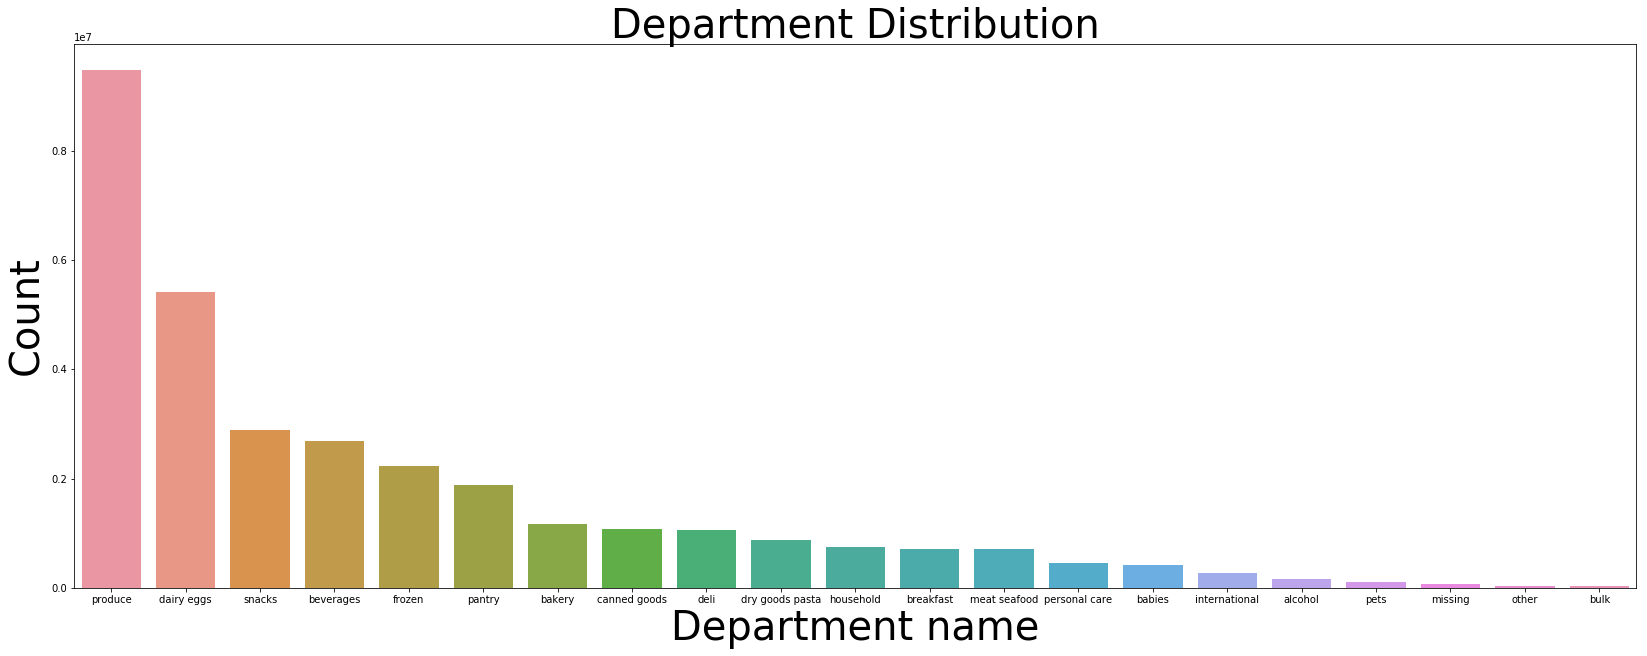

In [51]:
fig = plt.gcf()
fig.set_size_inches(28,10)

sns.barplot(x = 'index',y='department',data=dept_count)
plt.xlabel('Department name',fontsize = 40)
plt.ylabel('Count',fontsize = 40)
plt.title('Department Distribution',fontsize = 40)

Check the Aisle count

In [53]:
aisle_count = order_prior_merge_orders_merge_products_merge_aisle_merge_dept.aisle.value_counts().reset_index()
aisle_count.head(20)

,index,aisle
0,fresh fruits,3642188
1,fresh vegetables,3418021
2,packaged vegetables fruits,1765313
3,yogurt,1452343
4,packaged cheese,979763
5,milk,891015
6,water seltzer sparkling water,841533
7,chips pretzels,722470
8,soy lactosefree,638253
9,bread,584834


Text(0.5, 1.0, 'Top 20 Aisle Distribution')

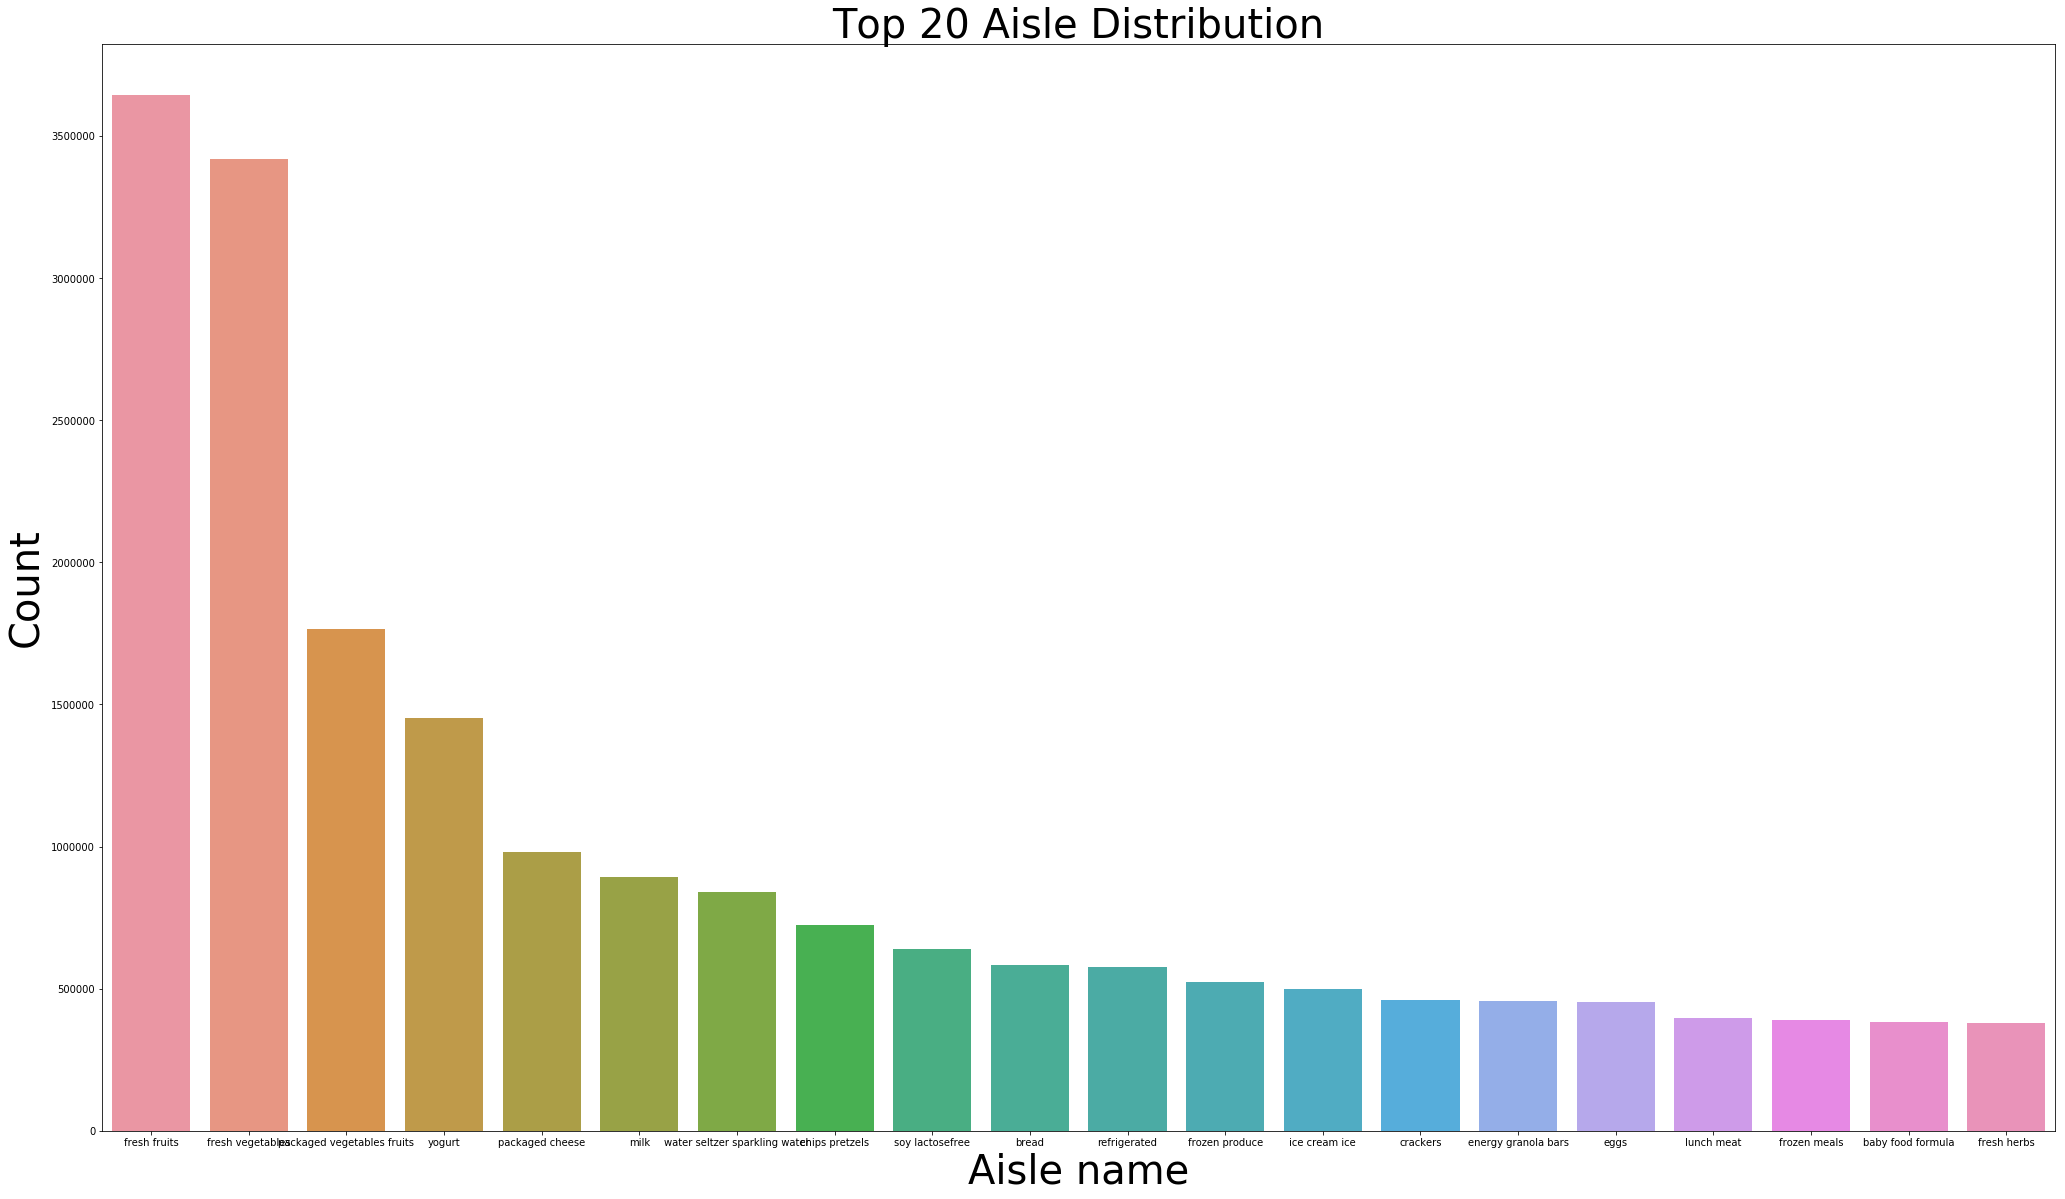

In [54]:
fig = plt.gcf()
fig.set_size_inches(35,20)
sns.barplot(x='index',y='aisle',data=aisle_count.head(20))
plt.xlabel('Aisle name',fontsize=40)
plt.ylabel('Count',fontsize=40)
plt.title('Top 20 Aisle Distribution',fontsize=40)

Check the maximum department involved during reordering

In [56]:
dept_count_reorder = order_prior_merge_orders_merge_products_merge_aisle_merge_dept.groupby(['department'])['reordered'].count().reset_index()
dept_count_reorder.sort_values('reordered',ascending=False)

,department,reordered
19,produce,9479291
7,dairy eggs,5414016
20,snacks,2887550
3,beverages,2690129
10,frozen,2236432
16,pantry,1875577
2,bakery,1176787
6,canned goods,1068058
8,deli,1051249
9,dry goods pasta,866627


Text(0.5,1,'No of orderes reordered as per Department')

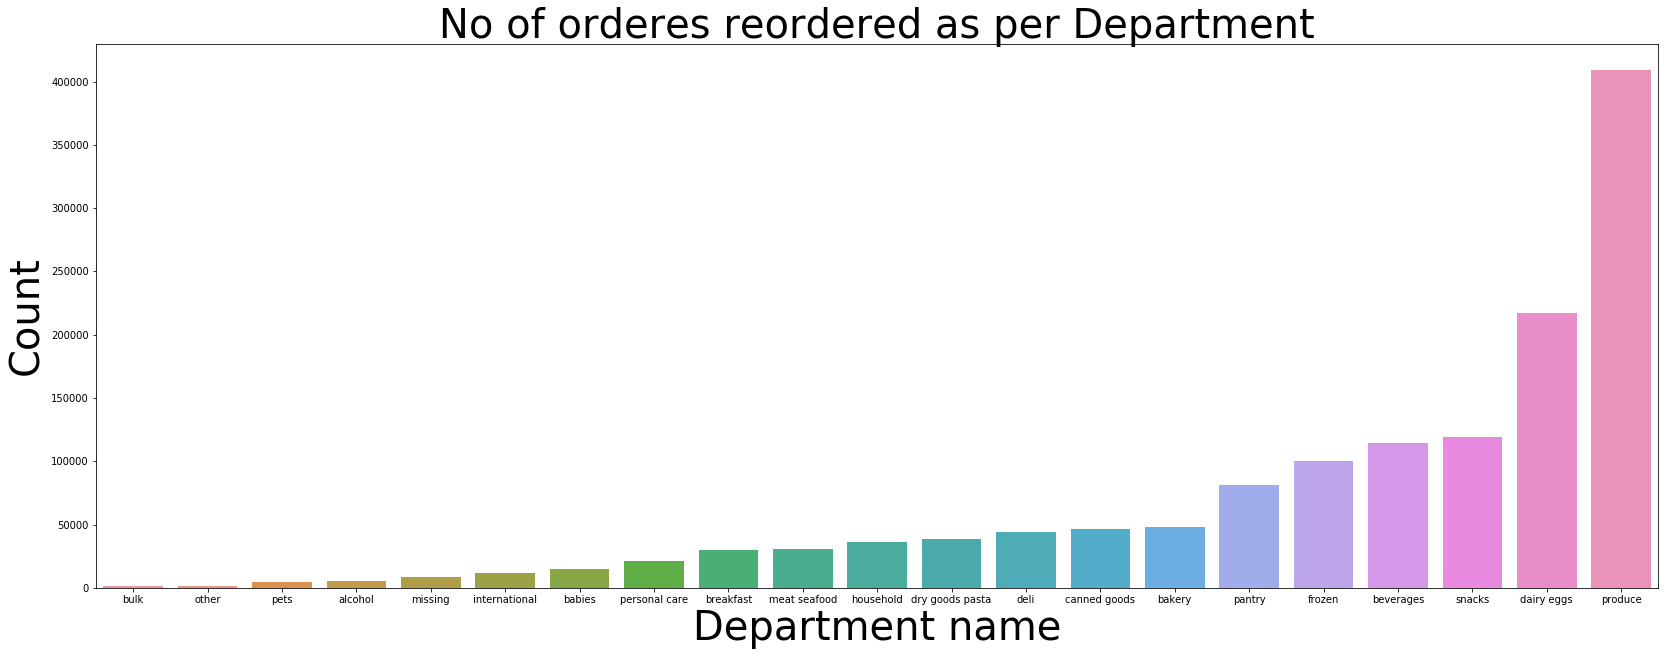

In [60]:
fig = plt.gcf()
fig.set_size_inches(28,10)

sns.barplot(x = 'department',y='reordered',data=dept_count_reorder.sort_values('reordered'))
# sns.barplot(x = 'department',y='reordered',data=dept_count_reorder.sort_index())
plt.xlabel('Department name',fontsize=40)
plt.ylabel('Count',fontsize=40)
plt.title('No of orderes reordered as per Department',fontsize=40)

Plot the most popular products that are reordered

In [58]:
dept_aile_prod_reordered = order_prior_merge_orders_merge_products_merge_aisle_merge_dept.groupby(['department','aisle','product_name'])['reordered'].count().reset_index()
top_20_prod = dept_aile_prod_reordered.sort_values('reordered',ascending=False)
top_20_prod.head()

,department,aisle,product_name,reordered
41755,produce,fresh fruits,Banana,472565
41753,produce,fresh fruits,Bag of Organic Bananas,379450
42009,produce,fresh fruits,Organic Strawberries,264683
43122,produce,packaged vegetables fruits,Organic Baby Spinach,241921
41970,produce,fresh fruits,Organic Hass Avocado,213584


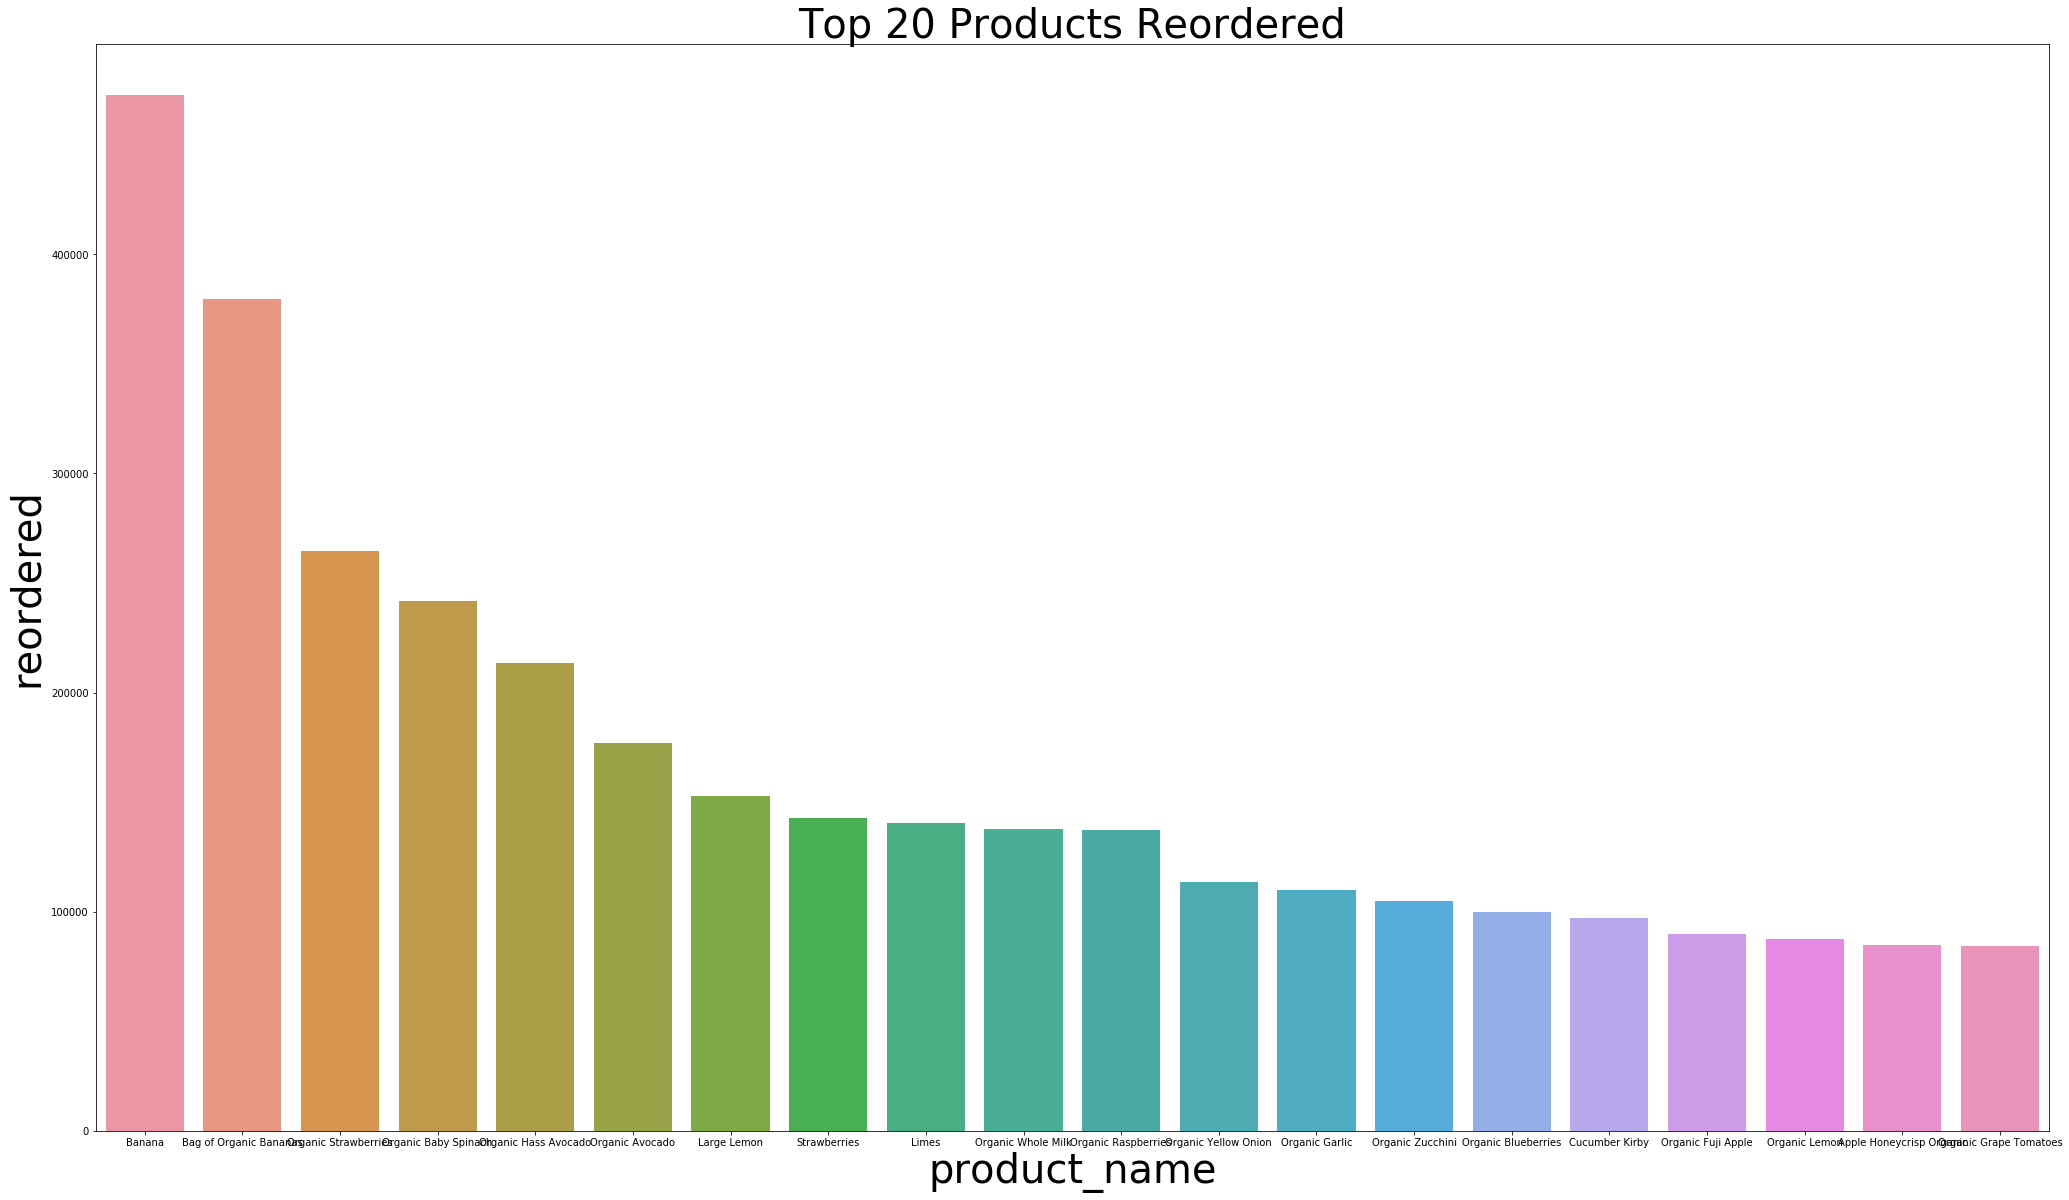

In [59]:
fig = plt.gcf()
fig.set_size_inches(35,20)
plt.xlabel('Product name',fontsize=40)
plt.ylabel('Count',fontsize=40)
plt.title('Top 20 Products Reordered',fontsize=40)
sns.barplot(x = 'product_name', y='reordered',data=top_20_prod.head(20))
plt.show()

Lets check the maxim number of products reordered

In [61]:
order_days = order_prior_merge_orders_merge_products_merge_aisle_merge_dept.groupby(['order_dow','order_hour_of_day','product_name','department','aisle'])['reordered'].count().reset_index()
order_days.head()

,order_dow,order_hour_of_day,product_name,department,aisle,reordered
0,0,0,".5\"" Waterproof Tape",personal care,first aid,1
1,0,0,0% Fat Blueberry Greek Yogurt,dairy eggs,yogurt,1
2,0,0,0% Fat Free Organic Milk,dairy eggs,milk,5
3,0,0,0% Fat Greek Yogurt Black Cherry on the Bottom,dairy eggs,yogurt,1
4,0,0,0% Fat Organic Greek Vanilla Yogurt,dairy eggs,yogurt,3


Logic to calculate the sum of reordered products for each hour of the day

In [62]:
temp_reorder = 0
dictionary={}
for i in range(7):
    for j in range(24):
                temp_reorder = order_days.reordered[(order_days.order_dow == i ) & (order_days.order_hour_of_day == j)].sum()
                record = "Record for day" , i ,"hour" , j 
                dictionary[record] = temp_reorder

maximum = max(dictionary,key=dictionary.get)
print(maximum,dictionary[maximum])

('Record for day', 0, 'hour', 14) 564896


The maximum time that the product is reordered is Sunday at 2'0 clock   
Lets now check the products which were reordered during this time.  
Yogurt is the highly reordered aisle

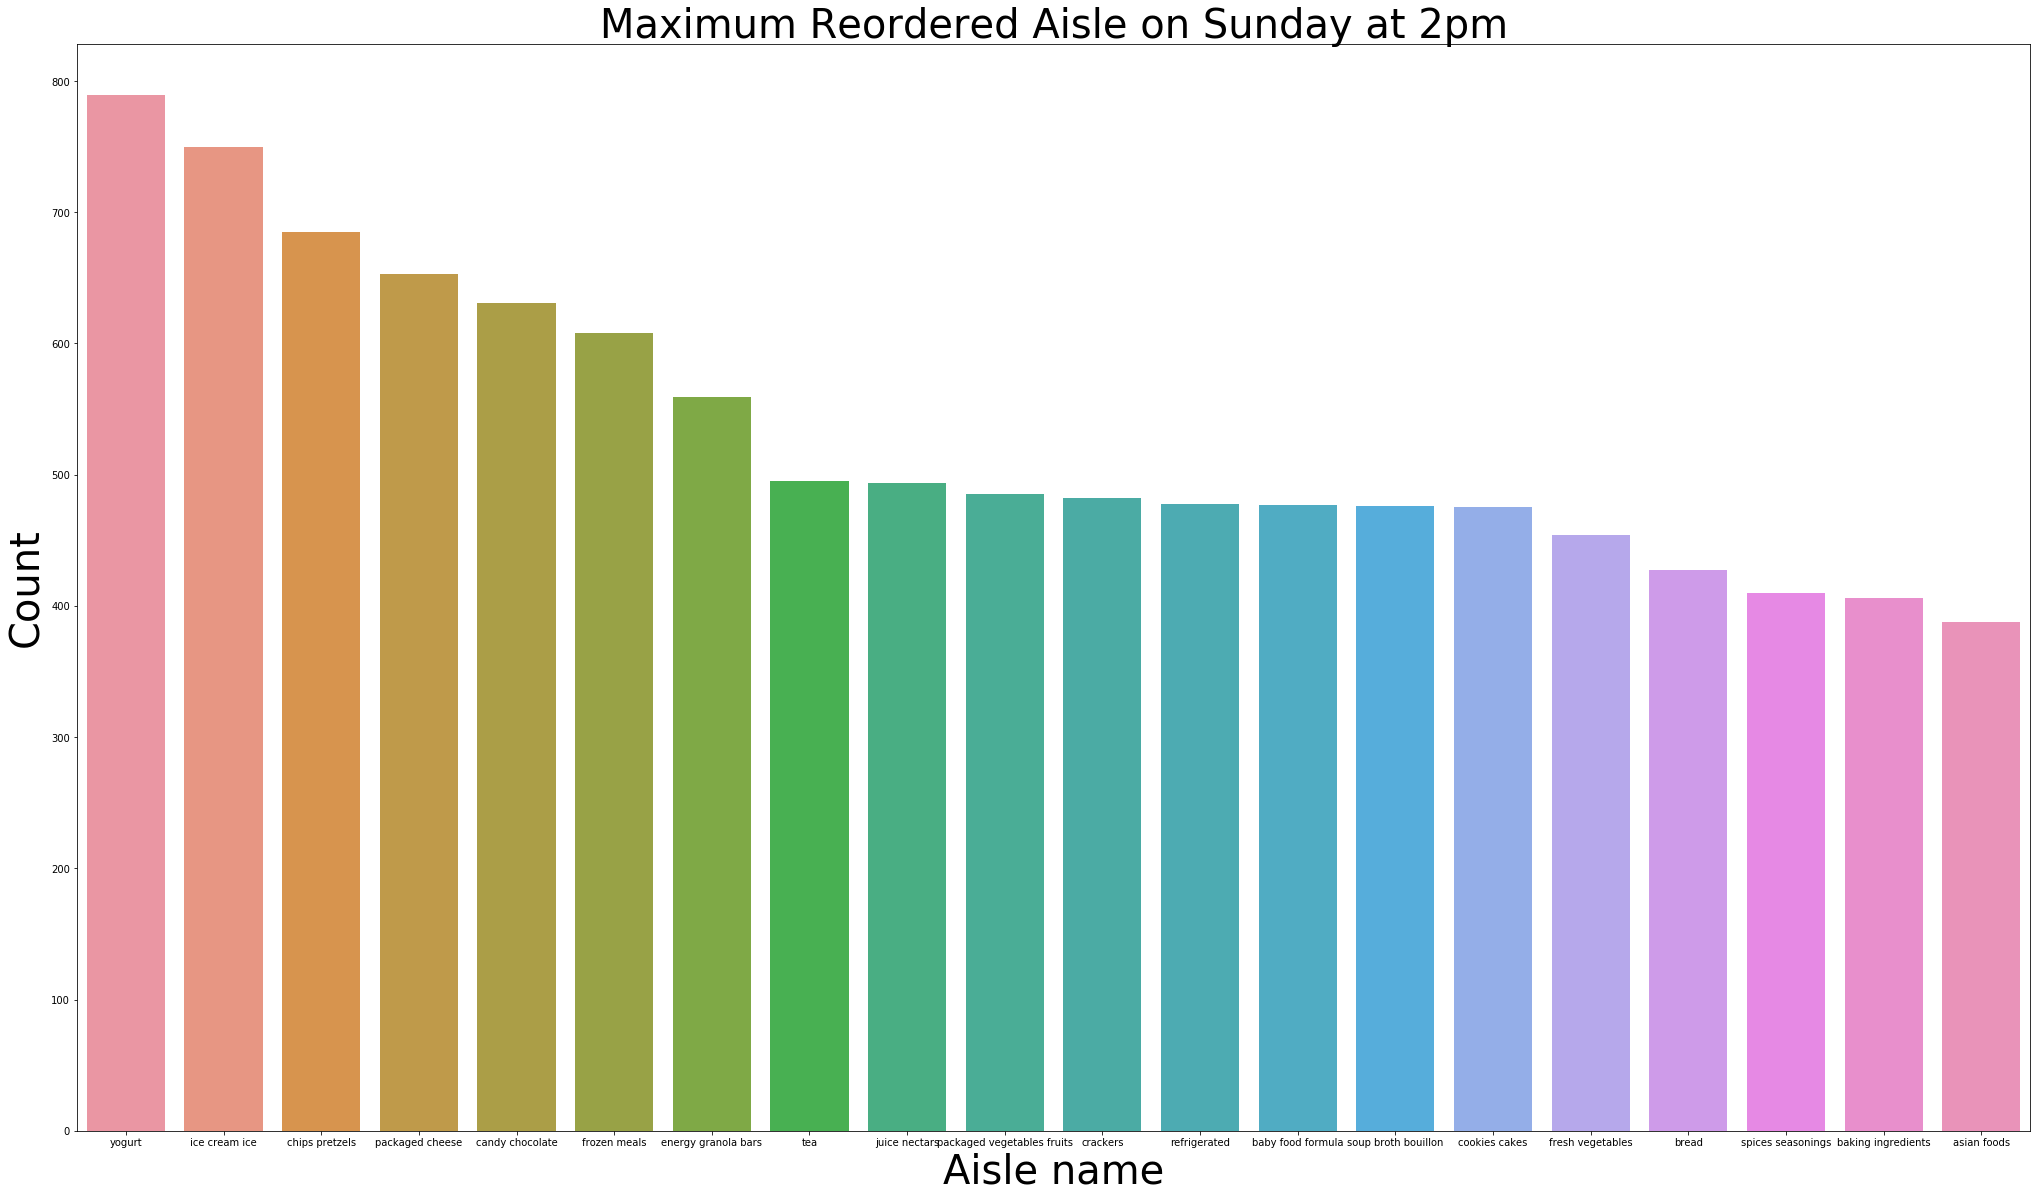

In [63]:
order_max_aisle = order_days.aisle[(order_days.order_dow==0) & (order_days.order_hour_of_day==14)]
fig = plt.gcf()
fig.set_size_inches(35,20)
sns.barplot(x='index',y='aisle',data=order_max_aisle.value_counts().reset_index().head(20))
plt.xlabel('Aisle name',fontsize=40)
plt.ylabel('Count',fontsize=40)
plt.title('Maximum Reordered Aisle on Sunday at 2pm',fontsize=40)
plt.show()

It seems that Snacks are reordered maximum on Sundays

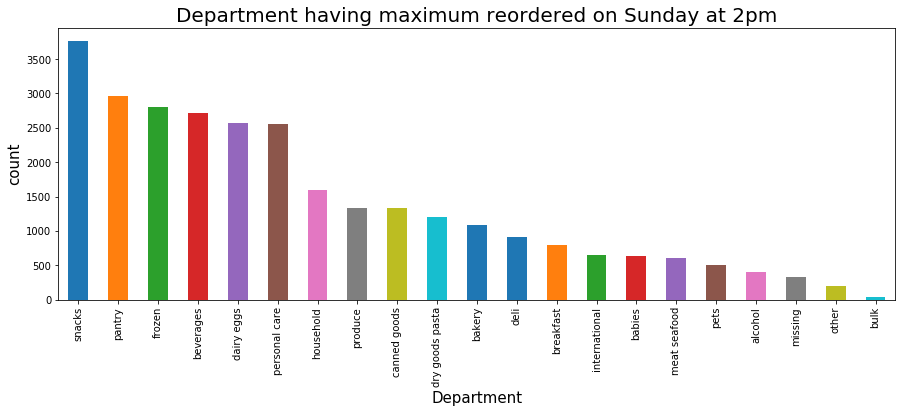

In [64]:
order_max_dep = order_days.department[(order_days.order_dow==0) & (order_days.order_hour_of_day==14)]
order_max_dep.value_counts().plot(kind='bar',figsize=(15,5))
plt.xlabel("Department",fontsize=15)
plt.ylabel("count",fontsize=15)
plt.title("Department having maximum reordered on Sunday at 2pm",fontsize=20)
plt.show()

Get the unique Aisle and Product Ids

In [66]:
aisle_unique =  np.unique(order_prior_merge_orders_merge_products_merge_aisle_merge_dept['aisle'])

In [67]:
product_name_unique = np.unique(order_prior_merge_orders_merge_products_merge_aisle_merge_dept['product_name'])
product_name_unique.size

49677

Group the Department and Aisle as per the Product and plot it

In [68]:
product_aisle = order_prior_merge_orders_merge_products_merge_aisle_merge_dept.groupby(['department','aisle'])['product_id'].aggregate({'Total_products': 'count'}).reset_index()
product_aisle.head()

C:\Users\nikhi\Anaconda4\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


,department,aisle,Total_products
0,alcohol,beers coolers,48657
1,alcohol,red wines,35181
2,alcohol,specialty wines champagnes,11198
3,alcohol,spirits,28102
4,alcohol,white wines,30558


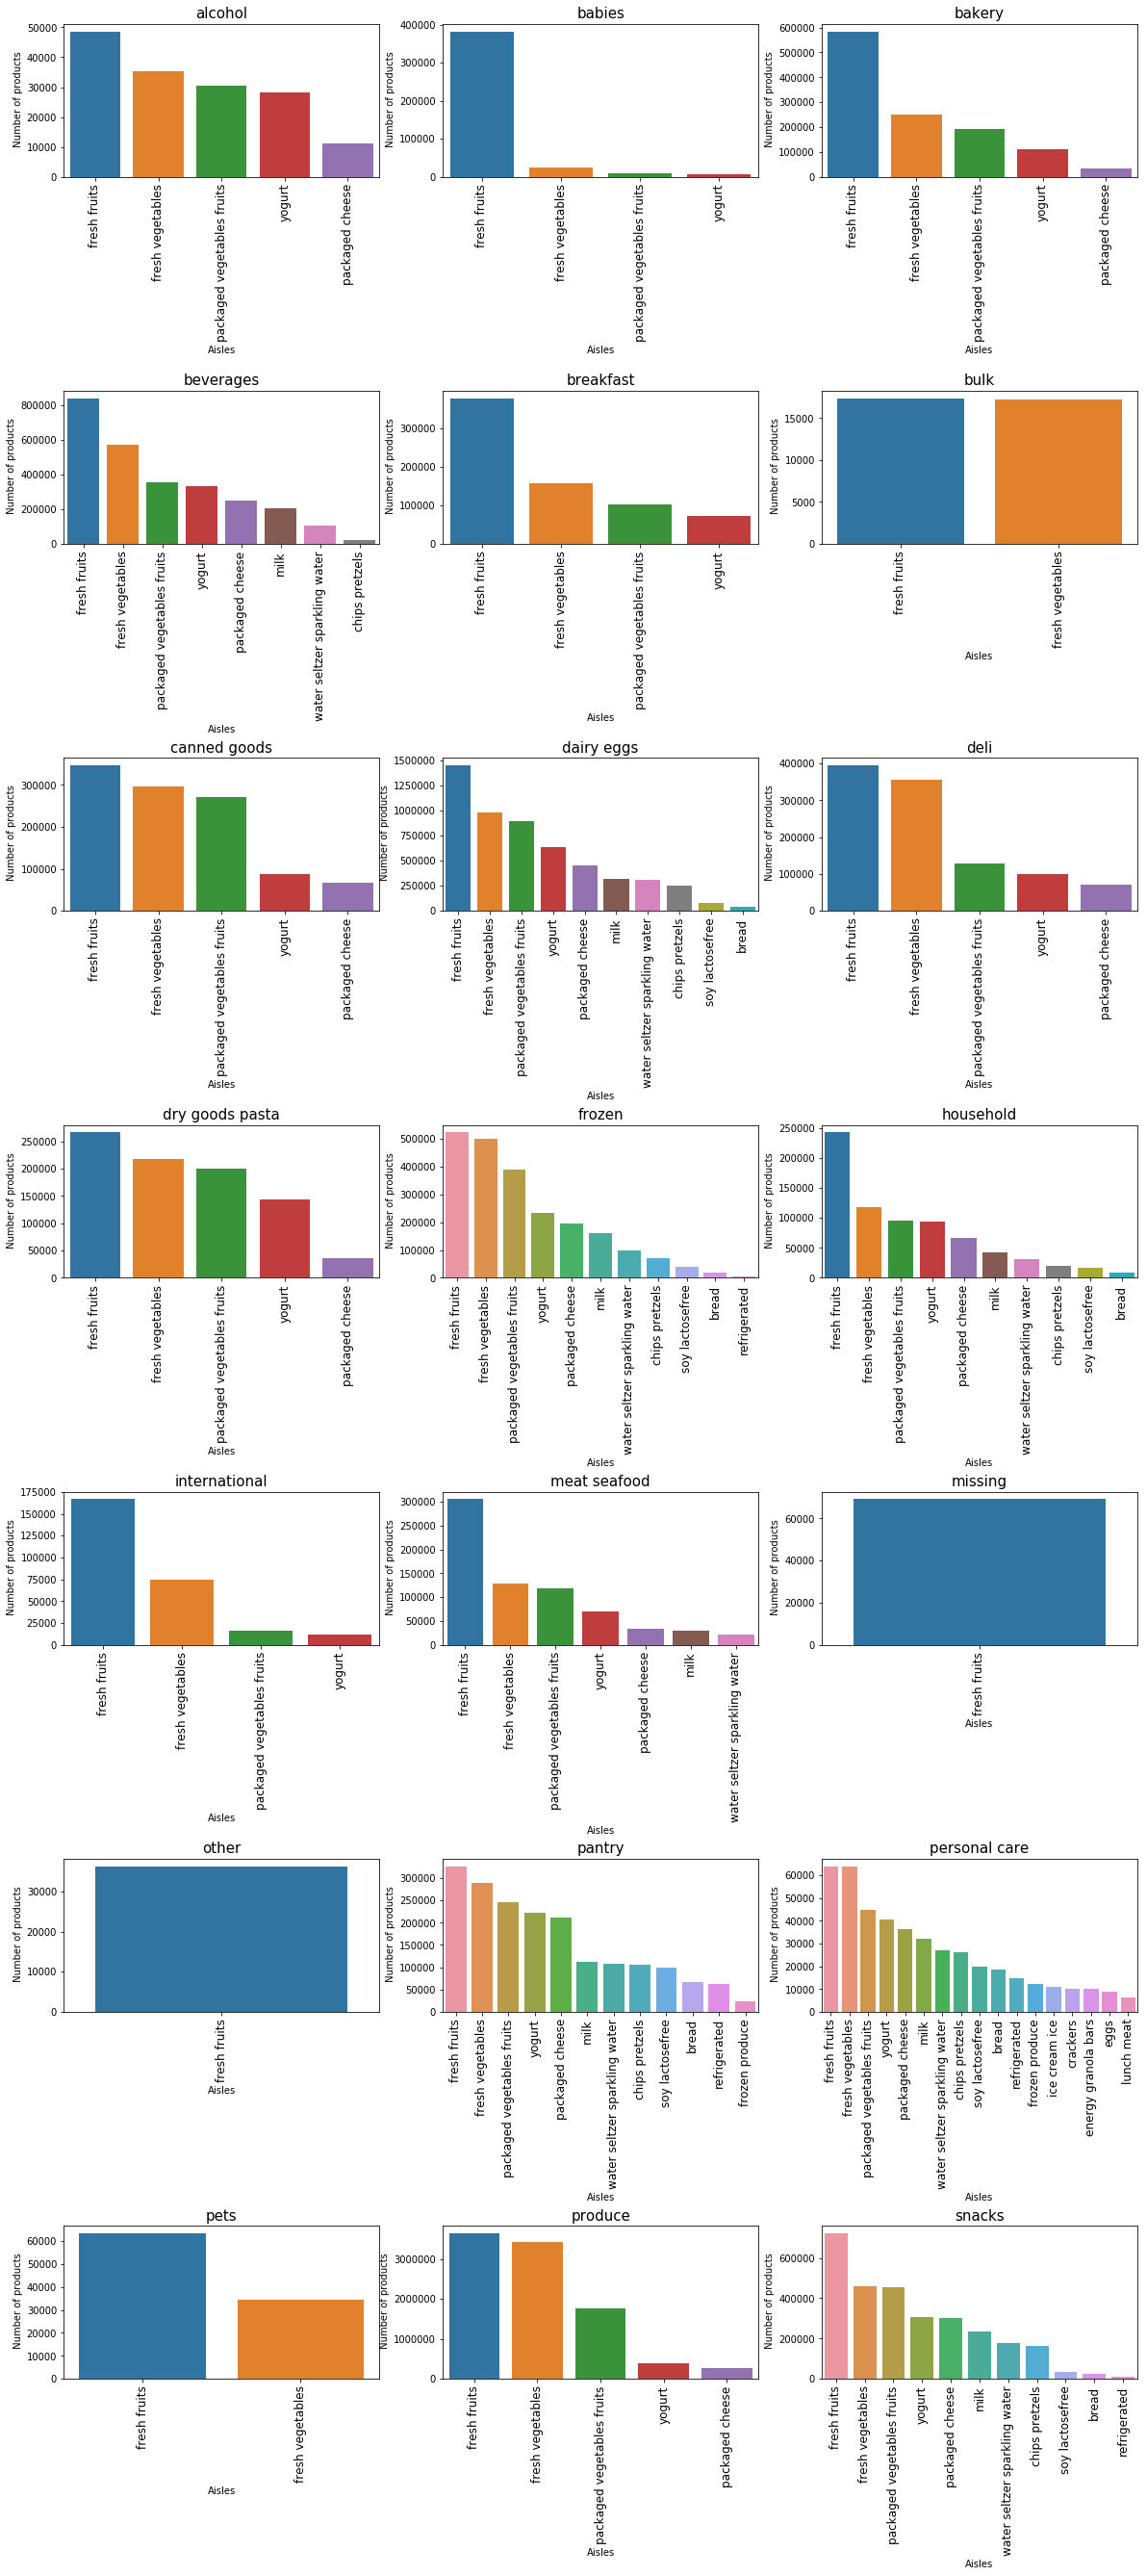

In [69]:
product_aisle.sort_values(by='Total_products', ascending=False, inplace=True)
fig, axes = plt.subplots(7,3, figsize=(20,45), gridspec_kw =  dict(hspace=1.4))
for (aisle, group), ax in zip(product_aisle.groupby(["department"]), axes.flatten()):
    g = sns.barplot(group.aisle, product_aisle.Total_products , ax=ax)
    ax.set(xlabel = "Aisles", ylabel=" Number of products")
    g.set_xticklabels(labels = product_aisle.aisle,rotation=90, fontsize=12)
    ax.set_title(aisle, fontsize=15)

## Conclusion:
We have seen analysis of various factors on each step in the notebook.  
Below were the interesting findings

--Maximum reorders are 7 days since prior order    

--Day and time of the week the product was reordered :     Sunday 2pm    

--Bananas, Bag of Organic , Banana Organic,Baby Spinach are the maximum products sold   

--Department  : Produce Department, Diary Eggs , Snacks Department are the departments which were reordered maximum   

--Aisle which have maximum sold products  : Fresh Fruits , fresh vegetables    



    